In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from skimage import color
import matplotlib.pyplot as plt

from src.features.serialization import load_features

Read data and turn into numpy array of 0 to 1 floats

In [2]:
df = load_features()

imgs = np.stack(df["image"][:1000]) # <- currently limiting data arbitrarily because full data takes up 22GB as 64-bit floats
imgs = imgs / 255
imgs.shape

(1000, 200, 200, 3)

Greyscale and flatten

In [3]:
X = color.rgb2gray(imgs)
X = X.reshape(X.shape[0], -1)
X.shape

(1000, 40000)

In [4]:
variation_to_explain=0.8
pca = PCA(variation_to_explain)
pca.fit(X)

PCA(n_components=0.8)

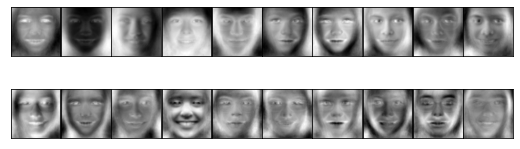

In [5]:
fig, axes = plt.subplots(2, 10,figsize=(9, 3), subplot_kw={"xticks":[], "yticks":[]}, gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(200, 200), cmap="gray")